In [13]:
from DataModel import MinistData
from Net import LeNet
from matplotlib import pyplot as plt
import torch
device="cuda" if torch.cuda.is_available() else "cpu"
test_data=MinistData('D:/datasets/MNIST/raw/t10k-images-idx3-ubyte','D:/datasets/MNIST/raw/t10k-labels-idx1-ubyte')
net=torch.load('LeNet.bin',map_location=device)
ans=[]
img=[]
for i,(X,y) in enumerate(test_data):
    X,y=X.to(device),y.to(device)
    img.append(X.to('cpu').permute(1,2,0))
    X=torch.reshape(X,(1,1,28,28))
    y_hat=net(X)
    ans.append(torch.argmax(y_hat).item())
    if i==9:
        break

In [16]:
def plot(images,labels):
    plt.figure(figsize=(10,6))
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.title(f"num {labels[i]}")
        plt.imshow(images[i])
    
    

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

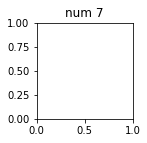

In [17]:
plot(img,ans)